## Grid

Plot grid resolution

In [1]:
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from glob import glob
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
from tqdm import tqdm_notebook

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [3]:
def plotgrid(geolon_t,geolat_t,dxt,dyt,desc,model):
    plt.figure(figsize(9.5,12))
    clev = np.linspace(min(np.min(dxt), np.min(dyt)),max(np.max(dxt), np.max(dyt)),51)

    plt.subplot(1,2,1)
    map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-280,urcrnrlon=80,resolution='l')
    map.drawmapboundary(fill_color='gray') # background color - for non-ocean areas
    map.drawparallels(np.arange(-90.,91.,30.),labels=[True,False,False,False],linewidth=0.25)
    map.drawmeridians(np.arange(-270,81,45),labels=[False,False,False,True],linewidth=0.25)
    X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,dxt, cmap=plt.cm.viridis, levels=clev) #CMRmap_r, gist_stern_r
    plt.title('x-size of T cells in ' + model)

    plt.subplot(1,2,2)
    map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-280,urcrnrlon=80,resolution='l')
    map.drawmapboundary(fill_color='gray') # background color - for non-ocean areas
    map.drawparallels(np.arange(-90.,91.,30.),labels=[True,False,False,False],linewidth=0.25)
    map.drawmeridians(np.arange(-270,81,45),labels=[False,False,False,True],linewidth=0.25)
    X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,dyt, cmap=plt.cm.viridis, levels=clev) #CMRmap_r, gist_stern_r
    plt.title('y-size of T cells in ' + model)
    
    ax3 = plt.axes([0.92,0.43,0.02,0.14])

    cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
    cb.ax.set_ylabel('dxt, dyt (m)')

    savefigure('grid_'+ekey)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


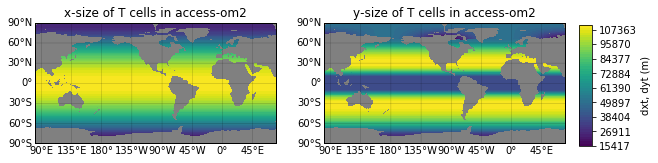

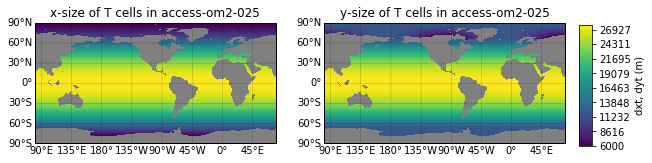

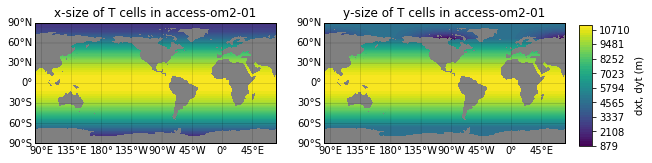

In [4]:
for ekey in exptdata.exptdict.keys():
    exptdir = exptdata.exptdict[ekey]['exptdir']
    desc = exptdata.exptdict[ekey]['desc']
    model = exptdata.exptdict[ekey]['model']
    gridFileList = glob(os.path.join(exptdir, 'output*/ocean/ocean_grid.nc'))
    gridFileList.sort()
    ncFile = Dataset(gridFileList[0],'r')
    dxt = ncFile.variables['dxt'][...]
    dyt = ncFile.variables['dyt'][...]
    geolon_t = ncFile.variables['geolon_t'][...]
    geolat_t = ncFile.variables['geolat_t'][...]
    ncFile.close()
    plotgrid(geolon_t,geolat_t,dxt,dyt,desc,model)